# Test Code


In [2]:
print("Hello, SageMaker!")

Hello, SageMaker!


# Playing with git

In [3]:
!git config user.name "Brian Pasquini"

In [4]:
!git config user.email brian@pitt.edu

In [8]:
!git pull

Already up to date.


In [7]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [2]:
!git branch --list

* main


# Prerequisites (Undocumented)

## Upgrade pip

In [50]:
! /home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


## Install sagemaker library

In [51]:
! pip install -qU sagemaker

# Download, Explore, and Transform a Dataset

## Load Adult Census Dataset Using SHAP


In [52]:
import shap
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
feature_names = list(X.columns)
feature_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

## Overview the Dataset

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581646,3.868892,10.080679,2.611836,6.572740,2.494518,3.665858,0.669205,1077.649170,87.303833,40.437454,36.718866
std,13.640442,1.455960,2.572562,1.506222,4.228857,1.758232,0.848806,0.470506,7385.911621,403.014771,12.347933,7.823782
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,4.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


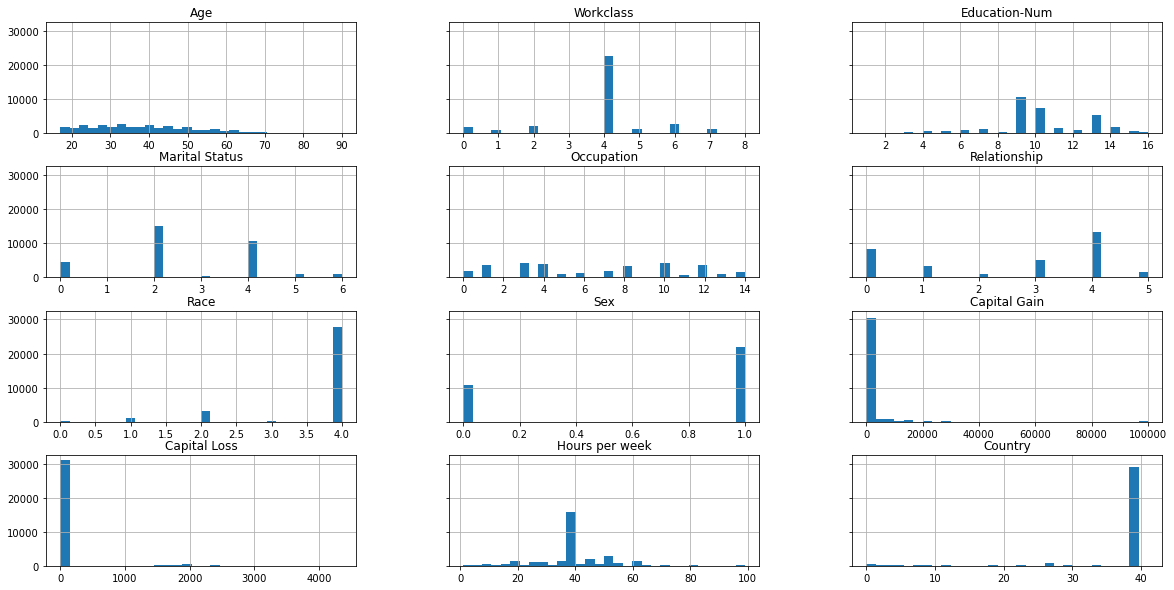

In [53]:
display(X.describe())
hist = X.hist(bins=30, sharey=True, figsize=(20, 10))

## Split the Dataset into Train, Validation, and Test Datasets

Using Sklearn, split the dataset into a training set and a test set. The training set is used to train the model, while the test set is used to evaluate the performance of the final trained model. The dataset is randomly sorted with the fixed random seed: 80 percent of the dataset for training set and 20 percent of it for a test set.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_display = X_display.loc[X_train.index]

Split the training set to separate out a validation set. The validation set is used to evaluate the performance of the trained model while tuning the model's hyperparameters. 75 percent of the training set becomes the final training set, and the rest is the validation set.

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
X_train_display = X_display.loc[X_train.index]
X_val_display = X_display.loc[X_val.index]

Using the pandas package, explicitly align each dataset by concatenating the numeric features with the true labels.

In [56]:
import pandas as pd
train = pd.concat([pd.Series(y_train, index=X_train.index, name='Income>50K', dtype=int), X_train], axis=1)
validation = pd.concat([pd.Series(y_val, index=X_val.index, name='Income>50K', dtype=int), X_val], axis=1)
test = pd.concat([pd.Series(y_test, index=X_test.index, name='Income>50K', dtype=int), X_test], axis=1)

Check if the dataset is split and structured as expected:

In [57]:
test

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
9646,0,62.0,6,4.0,6,8,0,4,0,0.0,0.0,66.0,39
709,0,18.0,4,7.0,4,8,2,4,1,0.0,0.0,25.0,39
7385,1,25.0,4,13.0,4,5,3,4,1,27828.0,0.0,50.0,39
16671,0,33.0,4,9.0,2,10,4,4,1,0.0,0.0,40.0,39
21932,0,36.0,4,7.0,4,7,1,4,0,0.0,0.0,40.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,1,39.0,4,13.0,2,10,5,4,0,0.0,0.0,20.0,39
25723,0,17.0,4,6.0,4,12,3,4,0,0.0,0.0,20.0,39
29514,0,35.0,4,9.0,4,14,3,4,1,0.0,0.0,40.0,39
1600,0,30.0,4,7.0,2,3,4,4,1,0.0,0.0,45.0,39


In [58]:
train

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
10911,1,47.0,4,9.0,2,3,4,4,1,0.0,0.0,40.0,39
17852,0,31.0,4,13.0,2,7,4,3,1,0.0,0.0,36.0,26
29165,1,32.0,4,10.0,2,13,5,4,0,0.0,0.0,32.0,39
30287,0,58.0,4,9.0,2,3,4,2,1,0.0,0.0,40.0,39
24019,0,17.0,4,6.0,4,6,3,4,1,0.0,0.0,20.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,0,43.0,4,8.0,2,14,4,4,1,0.0,0.0,40.0,39
6452,0,26.0,4,9.0,4,7,0,4,1,0.0,0.0,52.0,39
31352,0,32.0,7,14.0,2,10,4,4,1,0.0,0.0,50.0,39
6575,0,45.0,4,9.0,4,6,0,4,1,0.0,0.0,40.0,39


In [59]:
validation

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
16530,0,25.0,4,4.0,2,6,4,4,1,0.0,0.0,40.0,26
26723,0,41.0,6,9.0,2,5,5,4,0,0.0,0.0,40.0,39
3338,0,79.0,0,9.0,6,0,0,2,0,0.0,0.0,30.0,39
19367,1,43.0,2,15.0,2,10,4,4,1,15024.0,0.0,45.0,39
30274,0,51.0,5,9.0,4,12,2,4,1,0.0,0.0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,0,46.0,7,9.0,2,13,4,4,1,0.0,0.0,40.0,39
5937,1,71.0,4,10.0,6,12,0,4,1,0.0,0.0,35.0,39
11034,0,36.0,4,9.0,5,14,2,4,1,0.0,0.0,60.0,26
2819,0,31.0,4,9.0,4,8,0,4,0,0.0,0.0,40.0,39


## Convert the Train and Validation Datasets to CSV Files

In [60]:
# Use 'csv' format to store the data
# The first column is expected to be the output column
train.to_csv('train.csv', index=False, header=False)
validation.to_csv('validation.csv', index=False, header=False)

## Upload the Datasets to Amazon S3

The following code sets up the default S3 bucket URI for your current SageMaker session, creates a new demo-sagemaker-xgboost-adult-income-prediction folder, and uploads the training and validation datasets to the data subfolder.

*Ran into issues with the original code. See the following link:*
https://docs.aws.amazon.com/sagemaker/latest/dg/automatic-model-tuning-ex-bucket.html

*UPDATE: Fixed with prerequisite section*

In [61]:
import sagemaker, boto3, os
bucket = sagemaker.Session().default_bucket()

# Workaround fix #1 - Did not work
#sess = sagemaker.Session()
#bucket = sess.default_bucket()

# Workaround fix #2 - Worked
#bucket = "sagemaker-studio-516077839494-4buqgbi5pl6"

prefix = "demo-sagemaker-xgboost-adult-income-prediction"

boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'data/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'data/validation.csv')).upload_file('validation.csv')

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


Run the following AWS CLI to check if the CSV files are successfully uploaded to the S3 bucket.

In [62]:
! aws s3 ls {bucket}/{prefix}/data --recursive

2023-01-06 01:32:27     786285 demo-sagemaker-xgboost-adult-income-prediction/data/train.csv
2023-01-06 01:32:28     262122 demo-sagemaker-xgboost-adult-income-prediction/data/validation.csv


# Train a Model

## Choose the Training Algorithm

To choose the right algorithm for your dataset, you typically need to evaluate different models to find the most suitable models to your data. For simplicity, the SageMaker XGBoost Algorithm built-in algorithm is used throughout this tutorial without the pre-evaluation of models.

## Create and Run a Training Job

1. Import the Amazon SageMaker Python SDK and start by retrieving the basic information from your current SageMaker session.

In [63]:
import sagemaker

region = sagemaker.Session().boto_region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn: {}".format(role))

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


AWS Region: us-east-1
RoleArn: arn:aws:iam::516077839494:role/service-role/AmazonSageMaker-ExecutionRole-20230105T084379


2. Create an XGBoost estimator using the sagemaker.estimator.Estimator class. In the following example code, the XGBoost estimator is named xgb_model.

In [7]:
from sagemaker.debugger import Rule, rule_configs
from sagemaker.session import TrainingInput

s3_output_location='s3://{}/{}/{}'.format(bucket, prefix, 'xgboost_model')

container=sagemaker.image_uris.retrieve("xgboost", region, "1.2-1")
print(container)

xgb_model=sagemaker.estimator.Estimator(
    image_uri=container,
    role=role,
    instance_count=1,
    instance_type='ml.m4.xlarge',
    volume_size=5,
    output_path=s3_output_location,
    sagemaker_session=sagemaker.Session(),
    rules=[Rule.sagemaker(rule_configs.create_xgboost_report())]
)

683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-xgboost:1.2-1


To construct the SageMaker estimator, specify the following parameters:

- image_uri – Specify the training container image URI. In this example, the SageMaker XGBoost training container URI is specified using sagemaker.image_uris.retrieve.

- role – The AWS Identity and Access Management (IAM) role that SageMaker uses to perform tasks on your behalf (for example, reading training results, call model artifacts from Amazon S3, and writing training results to Amazon S3).

- instance_count and instance_type – The type and number of Amazon EC2 ML compute instances to use for model training. For this training exercise, you use a single ml.m4.xlarge instance, which has 4 CPUs, 16 GB of memory, an Amazon Elastic Block Store (Amazon EBS) storage, and a high network performance. For more information about EC2 compute instance types, see Amazon EC2 Instance Types. For more information about billing, see Amazon SageMaker pricing.

- volume_size – The size, in GB, of the EBS storage volume to attach to the training instance. This must be large enough to store training data if you use File mode (File mode is on by default).

- output_path – The path to the S3 bucket where SageMaker stores the model artifact and training results.

- sagemaker_session – The session object that manages interactions with SageMaker API operations and other AWS service that the training job uses.

- rules – Specify a list of SageMaker Debugger built-in rules. In this example, the create_xgboost_report() rule creates an XGBoost report that provides insights into the training progress and results. For more information, see SageMaker Debugger XGBoost Training Report.

3. Set the hyperparameters for the XGBoost algorithm by calling the set_hyperparameters method of the estimator. For a complete list of XGBoost hyperparameters, see XGBoost Hyperparameters.

In [8]:
xgb_model.set_hyperparameters(
    max_depth = 5,
    eta = 0.2,
    gamma = 4,
    min_child_weight = 6,
    subsample = 0.7,
    objective = "binary:logistic",
    num_round = 1000
)

4. Use the TrainingInput class to configure a data input flow for training. The following example code shows how to configure TrainingInput objects to use the training and validation datasets you uploaded to Amazon S3 in the Split the Dataset into Train, Validation, and Test Datasets section.

In [9]:
from sagemaker.session import TrainingInput

train_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/train.csv"), content_type="csv"
)
validation_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/validation.csv"), content_type="csv"
)

5. To start model training, call the estimator's fit method with the training and validation datasets. By setting wait=True, the fit method displays progress logs and waits until training is complete.

For more information about model training, see Train a Model with Amazon SageMaker. **This tutorial training job might take up to 10 minutes**.

In [10]:
xgb_model.fit({"train": train_input, "validation": validation_input}, wait=True)

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2023-01-05-23-08-32-765


After the training job has done, you can download an XGBoost training report and a profiling report generated by SageMaker Debugger. The XGBoost training report offers you insights into the training progress and results, such as the loss function with respect to iteration, feature importance, confusion matrix, accuracy curves, and other statistical results of training. For example, you can find the following loss curve from the XGBoost training report which clearly indicates that there is an overfitting problem.

Run the following code to specify the S3 bucket URI where the Debugger training reports are generated and check if the reports exist.

In [11]:
rule_output_path = xgb_model.output_path + "/" + xgb_model.latest_training_job.job_name + "/rule-output"
! aws s3 ls {rule_output_path} --recursive

2023-01-05 23:18:00        314 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2023-01-05-23-08-32-765/rule-output/CreateXgboostReport/xgboost-reports/ConfusionMatrix.json
2023-01-05 23:17:59        734 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2023-01-05-23-08-32-765/rule-output/CreateXgboostReport/xgboost-reports/EvaluationMetrics.json
2023-01-05 23:17:59       2691 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2023-01-05-23-08-32-765/rule-output/CreateXgboostReport/xgboost-reports/FeatureImportance.json
2023-01-05 23:17:59       9599 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2023-01-05-23-08-32-765/rule-output/CreateXgboostReport/xgboost-reports/IterativeClassAccuracy.json
2023-01-05 23:18:00        180 demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2023-01-05-23-08-32-765/rule-output/CreateXgboostReport/xgboost-rep

Download the Debugger XGBoost training and profiling reports to the current workspace:

In [12]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-516077839494/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2023-01-05-23-08-32-765/rule-output/CreateXgboostReport/xgboost-reports/ConfusionMatrix.json to CreateXgboostReport/xgboost-reports/ConfusionMatrix.json
download: s3://sagemaker-us-east-1-516077839494/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2023-01-05-23-08-32-765/rule-output/CreateXgboostReport/xgboost-reports/EvaluationMetrics.json to CreateXgboostReport/xgboost-reports/EvaluationMetrics.json
download: s3://sagemaker-us-east-1-516077839494/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2023-01-05-23-08-32-765/rule-output/CreateXgboostReport/xgboost-reports/IterativeClassAccuracy.json to CreateXgboostReport/xgboost-reports/IterativeClassAccuracy.json
download: s3://sagemaker-us-east-1-516077839494/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2023-01-05-23-0

Run the following IPython script to get the file link of the XGBoost training report:

In [13]:
from IPython.display import FileLink, FileLinks
display("Click link below to view the XGBoost Training report", FileLink("CreateXgboostReport/xgboost_report.html"))

'Click link below to view the XGBoost Training report'

/home/ec2-user/SageMaker/CreateXgboostReport/xgboost_report.html

The following IPython script returns the file link of the Debugger profiling report that shows summaries and details of the EC2 instance resource utilization, system bottleneck detection results, and python operation profiling results:

In [20]:
xgb_model.latest_training_job.rule_job_summary()

[{'RuleConfigurationName': 'CreateXgboostReport',
  'RuleEvaluationJobArn': 'arn:aws:sagemaker:us-east-1:516077839494:processing-job/sagemaker-xgboost-2023-01--createxgboostreport-07e9579b',
  'RuleEvaluationStatus': 'NoIssuesFound',
  'LastModifiedTime': datetime.datetime(2023, 1, 5, 23, 18, 19, 152000, tzinfo=tzlocal())}]

In [16]:
profiler_report_name = [rule["RuleConfigurationName"] 
                        for rule in xgb_model.latest_training_job.rule_job_summary() 
                        if "Profiler" in rule["RuleConfigurationName"]][0]
profiler_report_name
display("Click link below to view the profiler report", FileLink(profiler_report_name+"/profiler-output/profiler-report.html"))

IndexError: list index out of range

You now have a trained XGBoost model. SageMaker stores the model artifact in your S3 bucket. To find the location of the model artifact, run the following code to print the model_data attribute of the xgb_model estimator:

In [64]:
xgb_model.model_data

's3://sagemaker-us-east-1-516077839494/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2023-01-05-23-08-32-765/output/model.tar.gz'

# Deploy the Model to Amazon EC2

## Deploy the Model to SageMaker Hosting Services

In [21]:
import sagemaker
from sagemaker.serializers import CSVSerializer
xgb_predictor=xgb_model.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium',
    serializer=CSVSerializer()
)

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2023-01-06-01-13-20-954
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2023-01-06-01-13-20-954
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2023-01-06-01-13-20-954


---------!

- initial_instance_count (int) – The number of instances to deploy the model.

- instance_type (str) – The type of instances that you want to operate your deployed model.

- serializer (int) – Serialize input data of various formats (a NumPy array, list, file, or buffer) to a CSV-formatted string. We use this because the XGBoost algorithm accepts input files in CSV format.

The deploy method creates a deployable model, configures the SageMaker hosting services endpoint, and launches the endpoint to host the model. For more information, see the SageMaker generic Estimator's deploy class method in the Amazon SageMaker Python SDK. To retrieve the name of endpoint that's generated by the deploy method, run the following code:

In [65]:
xgb_predictor.endpoint_name

'sagemaker-xgboost-2023-01-06-01-13-20-954'

This should return the endpoint name of the xgb_predictor. The format of the endpoint name is "sagemaker-xgboost-YYYY-MM-DD-HH-MM-SS-SSS". This endpoint stays active in the ML instance, and you can make instantaneous predictions at any time unless you shut it down later. Copy this endpoint name and save it to reuse and make real-time predictions elsewhere in SageMaker Studio or SageMaker notebook instances.

## Use SageMaker Predictor to Reuse the Hosted Endpoint

After you deploy the model to an endpoint, you can set up a new SageMaker predictor by pairing the endpoint and continuously make real-time predictions in any other notebooks. The following example code shows how to use the SageMaker Predictor class to set up a new predictor object using the same endpoint. Re-use the endpoint name that you used for the xgb_predictor.

The xgb_predictor_reuse Predictor behaves exactly the same as the original xgb_predictor. For more information, see the SageMaker Predictor class in the Amazon SageMaker Python SDK.

In [25]:
import sagemaker
xgb_predictor_reuse=sagemaker.predictor.Predictor(
    #endpoint_name="sagemaker-xgboost-YYYY-MM-DD-HH-MM-SS-SSS",
    endpoint_name="sagemaker-xgboost-2023-01-06-01-13-20-954",
    sagemaker_session=sagemaker.Session(),
    serializer=sagemaker.serializers.CSVSerializer()
)

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


## Make Prediction with Batch Transform

Instead of hosting an endpoint in production, you can run a one-time batch inference job to make predictions on a test dataset using the SageMaker batch transform. After your model training has completed, you can extend the estimator to a transformer object, which is based on the SageMaker Transformer class. The batch transformer reads in input data from a specified S3 bucket and makes predictions.

1. Run the following code to convert the feature columns of the test dataset to a CSV file and uploads to the S3 bucket:

In [66]:
X_test.to_csv('test.csv', index=False, header=False)

boto3.Session().resource('s3').Bucket(bucket).Object(
os.path.join(prefix, 'test/test.csv')).upload_file('test.csv')

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


2. Specify S3 bucket URIs of input and output for the batch transform job as shown following:

In [67]:
# The location of the test dataset
batch_input = 's3://{}/{}/test'.format(bucket, prefix)

# The location to store the results of the batch transform job
batch_output = 's3://{}/{}/batch-prediction'.format(bucket, prefix)

3. Create a transformer object specifying the minimal number of parameters: the instance_count and instance_type parameters to run the batch transform job, and the output_path to save prediction data as shown following:

In [68]:
transformer = xgb_model.transformer(
    instance_count=1, 
    instance_type='ml.m4.xlarge', 
    output_path=batch_output
)

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2023-01-06-01-33-54-717


4. Initiate the batch transform job by executing the transform() method of the transformer object as shown following:

In [69]:
transformer.transform(
    data=batch_input, 
    data_type='S3Prefix',
    content_type='text/csv', 
    split_type='Line'
)
transformer.wait()

INFO:sagemaker:Creating transform job with name: sagemaker-xgboost-2023-01-06-01-34-04-776


....................................[2023-01-06:01:40:00:INFO] No GPUs detected (normal if no gpus installed)
[2023-01-06:01:40:00:INFO] No GPUs detected (normal if no gpus installed)
[2023-01-06:01:40:00:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }
  server {
    listen 8080 deferred;
    client_max_body_size 0;
    keepalive_timeout 3;
    location ~ ^/(ping|invocations|execution-parameters) {
      proxy_set_header X-Forwarded-For $proxy_add_x_forwarded_for;
      proxy_set_header Host $http_host;
      proxy_redirect off;
      proxy_read_timeout 60s;
      proxy_pass http://gunicorn;
    }
    location / {
      return 404 "{}";
    }
  }
}
[2023-01-06 01:40:00 +0000] [20] [INFO] Starting

5. When the batch transform job is complete, SageMaker creates the test.csv.out prediction data saved in the batch_output path, which should be in the following format: 

    s3://sagemaker-<region>-111122223333/demo-sagemaker-xgboost-adult-income-prediction/batch-prediction 
    
Run the following AWS CLI to download the output data of the batch transform job:

In [70]:
! aws s3 cp {batch_output} ./ --recursive

download: s3://sagemaker-us-east-1-516077839494/demo-sagemaker-xgboost-adult-income-prediction/batch-prediction/test.csv.out to ./test.csv.out


This should create the test.csv.out file under the current working directory. You'll be able to see the float values that are predicted based on the logistic regression of the XGBoost training job.

# Evaluate the Model

Now that you have trained and deployed a model using Amazon SageMaker, evaluate the model to ensure that it generates accurate predictions on new data. For model evaluation, use the test dataset that you created in Step 3: Download, Explore, and Transform a Dataset

## Evaluate the Model Deployed to SageMaker Hosting Services

To evaluate the model and use it in production, invoke the endpoint with the test dataset and check whether the inferences you get returns a target accuracy you want to achieve.

1. Set up the following function to predict each line of the test set. In the following example code, the rows argument is to specify the number of lines to predict at a time. You can change the value of it to perform a batch inference that fully utilizes the instance's hardware resource.

In [71]:
import numpy as np
def predict(data, rows=1000):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, xgb_predictor.predict(array).decode('utf-8')])
    return np.fromstring(predictions[1:], sep=',')

2. Run the following code to make predictions of the test dataset and plot a histogram. You need to take only the feature columns of the test dataset, excluding the 0th column for the actual values.

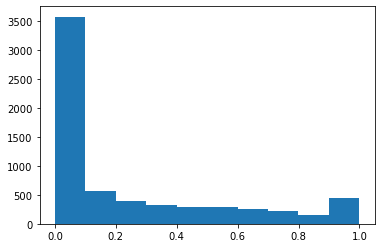

In [72]:
import matplotlib.pyplot as plt

predictions=predict(test.to_numpy()[:,1:])
plt.hist(predictions)
plt.show()

3. The predicted values are float type. To determine True or False based on the float values, you need to set a cutoff value. As shown in the following example code, use the Scikit-learn library to return the output confusion metrics and classification report with a cutoff of 0.5.

In [73]:
import sklearn

cutoff=0.5
print(sklearn.metrics.confusion_matrix(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))
print(sklearn.metrics.classification_report(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))

[[4670  356]
 [ 480 1007]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5026
           1       0.74      0.68      0.71      1487

    accuracy                           0.87      6513
   macro avg       0.82      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513



4. To find the best cutoff with the given test set, compute the log loss function of the logistic regression. The log loss function is defined as the negative log-likelihood of a logistic model that returns prediction probabilities for its ground truth labels. The following example code numerically and iteratively calculates the log loss values (-(y*log(p)+(1-y)log(1-p)), where y is the true label and p is a probability estimate of the corresponding test sample. It returns a log loss versus cutoff graph.

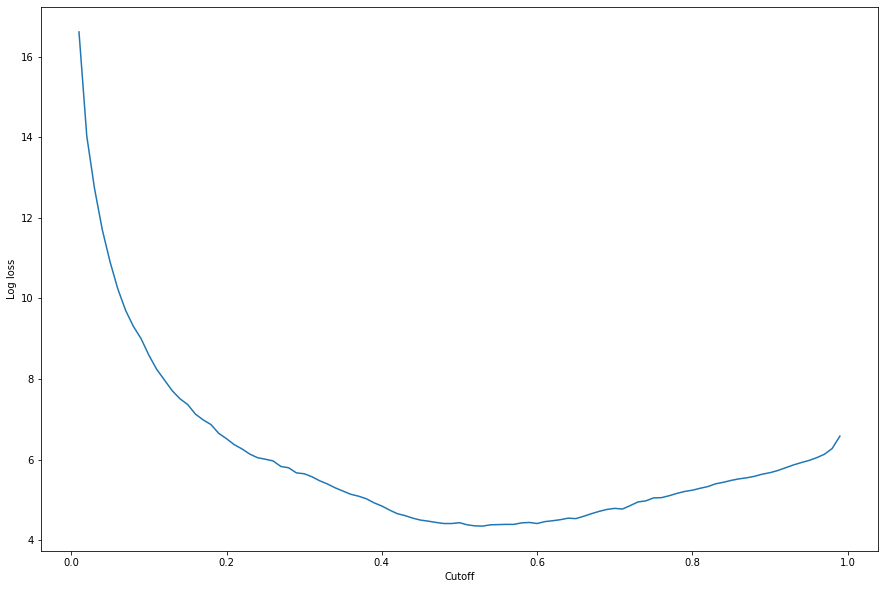

In [74]:
import matplotlib.pyplot as plt

cutoffs = np.arange(0.01, 1, 0.01)
log_loss = []
for c in cutoffs:
    log_loss.append(
        sklearn.metrics.log_loss(test.iloc[:, 0], np.where(predictions > c, 1, 0))
    )

plt.figure(figsize=(15,10))
plt.plot(cutoffs, log_loss)
plt.xlabel("Cutoff")
plt.ylabel("Log loss")
plt.show()

5. Find the minimum points of the error curve using the NumPy argmin and min functions:

In [75]:
print(
    'Log loss is minimized at a cutoff of ', cutoffs[np.argmin(log_loss)], 
    ', and the log loss value at the minimum is ', np.min(log_loss)
)

Log loss is minimized at a cutoff of  0.53 , and the log loss value at the minimum is  4.348539186773897


This should return: Log loss is minimized at a cutoff of 0.53, and the log loss value at the minimum is 4.348539186773897.

Instead of computing and minimizing the log loss function, you can estimate a cost function as an alternative. For example, if you want to train a model to perform a binary classification for a business problem such as a customer churn prediction problem, you can set weights to the elements of confusion matrix and calculate the cost function accordingly.

**You have now trained, deployed, and evaluated your first model in SageMaker.**

# Clean Up

1. Open the Amazon SageMaker console at https://console.aws.amazon.com/sagemaker/ and delete the following resources:

    - **The endpoint.** Deleting the endpoint also deletes the ML compute instance or instances that support it.

        a. Under Inference, choose Endpoints.

        b. Choose the endpoint that you created in the example, choose Actions, and then choose Delete.

    - **The endpoint configuration.**

        a. Under Inference, choose Endpoint configurations.

        b. Choose the endpoint configuration that you created in the example, choose Actions, and then choose Delete.

    - **The model.**

        a. Under Inference, choose Models.

        b. Choose the model that you created in the example, choose Actions, and then choose Delete.

    - **The notebook instance.** Before deleting the notebook instance, stop it.

        a. Under Notebook, choose Notebook instances.

        b. Choose the notebook instance that you created in the example, choose Actions, and then choose Stop. The notebook instance takes several minutes to stop. When the Status changes to Stopped, move on to the next step.

        c. Choose Actions, and then choose Delete.

2. Open the Amazon S3 console at https://console.aws.amazon.com/s3/, and then delete the bucket that you created for storing model artifacts and the training dataset.

3. Open the Amazon CloudWatch console at https://console.aws.amazon.com/cloudwatch/, and then delete all of the log groups that have names starting with /aws/sagemaker/.